In this project current price based on various parameters is estimated such as km, rating, economy, top speed. 

In [1]:
import pandas as pd 
data = pd.read_csv('car milage.csv')
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [2]:
data.describe()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
v.id             1000 non-null int64
on road old      1000 non-null int64
on road now      1000 non-null int64
years            1000 non-null int64
km               1000 non-null int64
rating           1000 non-null int64
condition        1000 non-null int64
economy          1000 non-null int64
top speed        1000 non-null int64
hp               1000 non-null int64
torque           1000 non-null int64
current price    1000 non-null float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [4]:
data['rating'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      5
2      2
3      4
4      3
      ..
995    1
996    2
997    1
998    4
999    4
Name: rating, Length: 1000, dtype: int64>

In [5]:
data.isnull().sum()

v.id             0
on road old      0
on road now      0
years            0
km               0
rating           0
condition        0
economy          0
top speed        0
hp               0
torque           0
current price    0
dtype: int64

In [6]:
import seaborn as sns
sns.heatmap(data.isnull(), yticklabels = False, cbar = True , cmap = 'viridis' )

Checking the data there is no null values. 

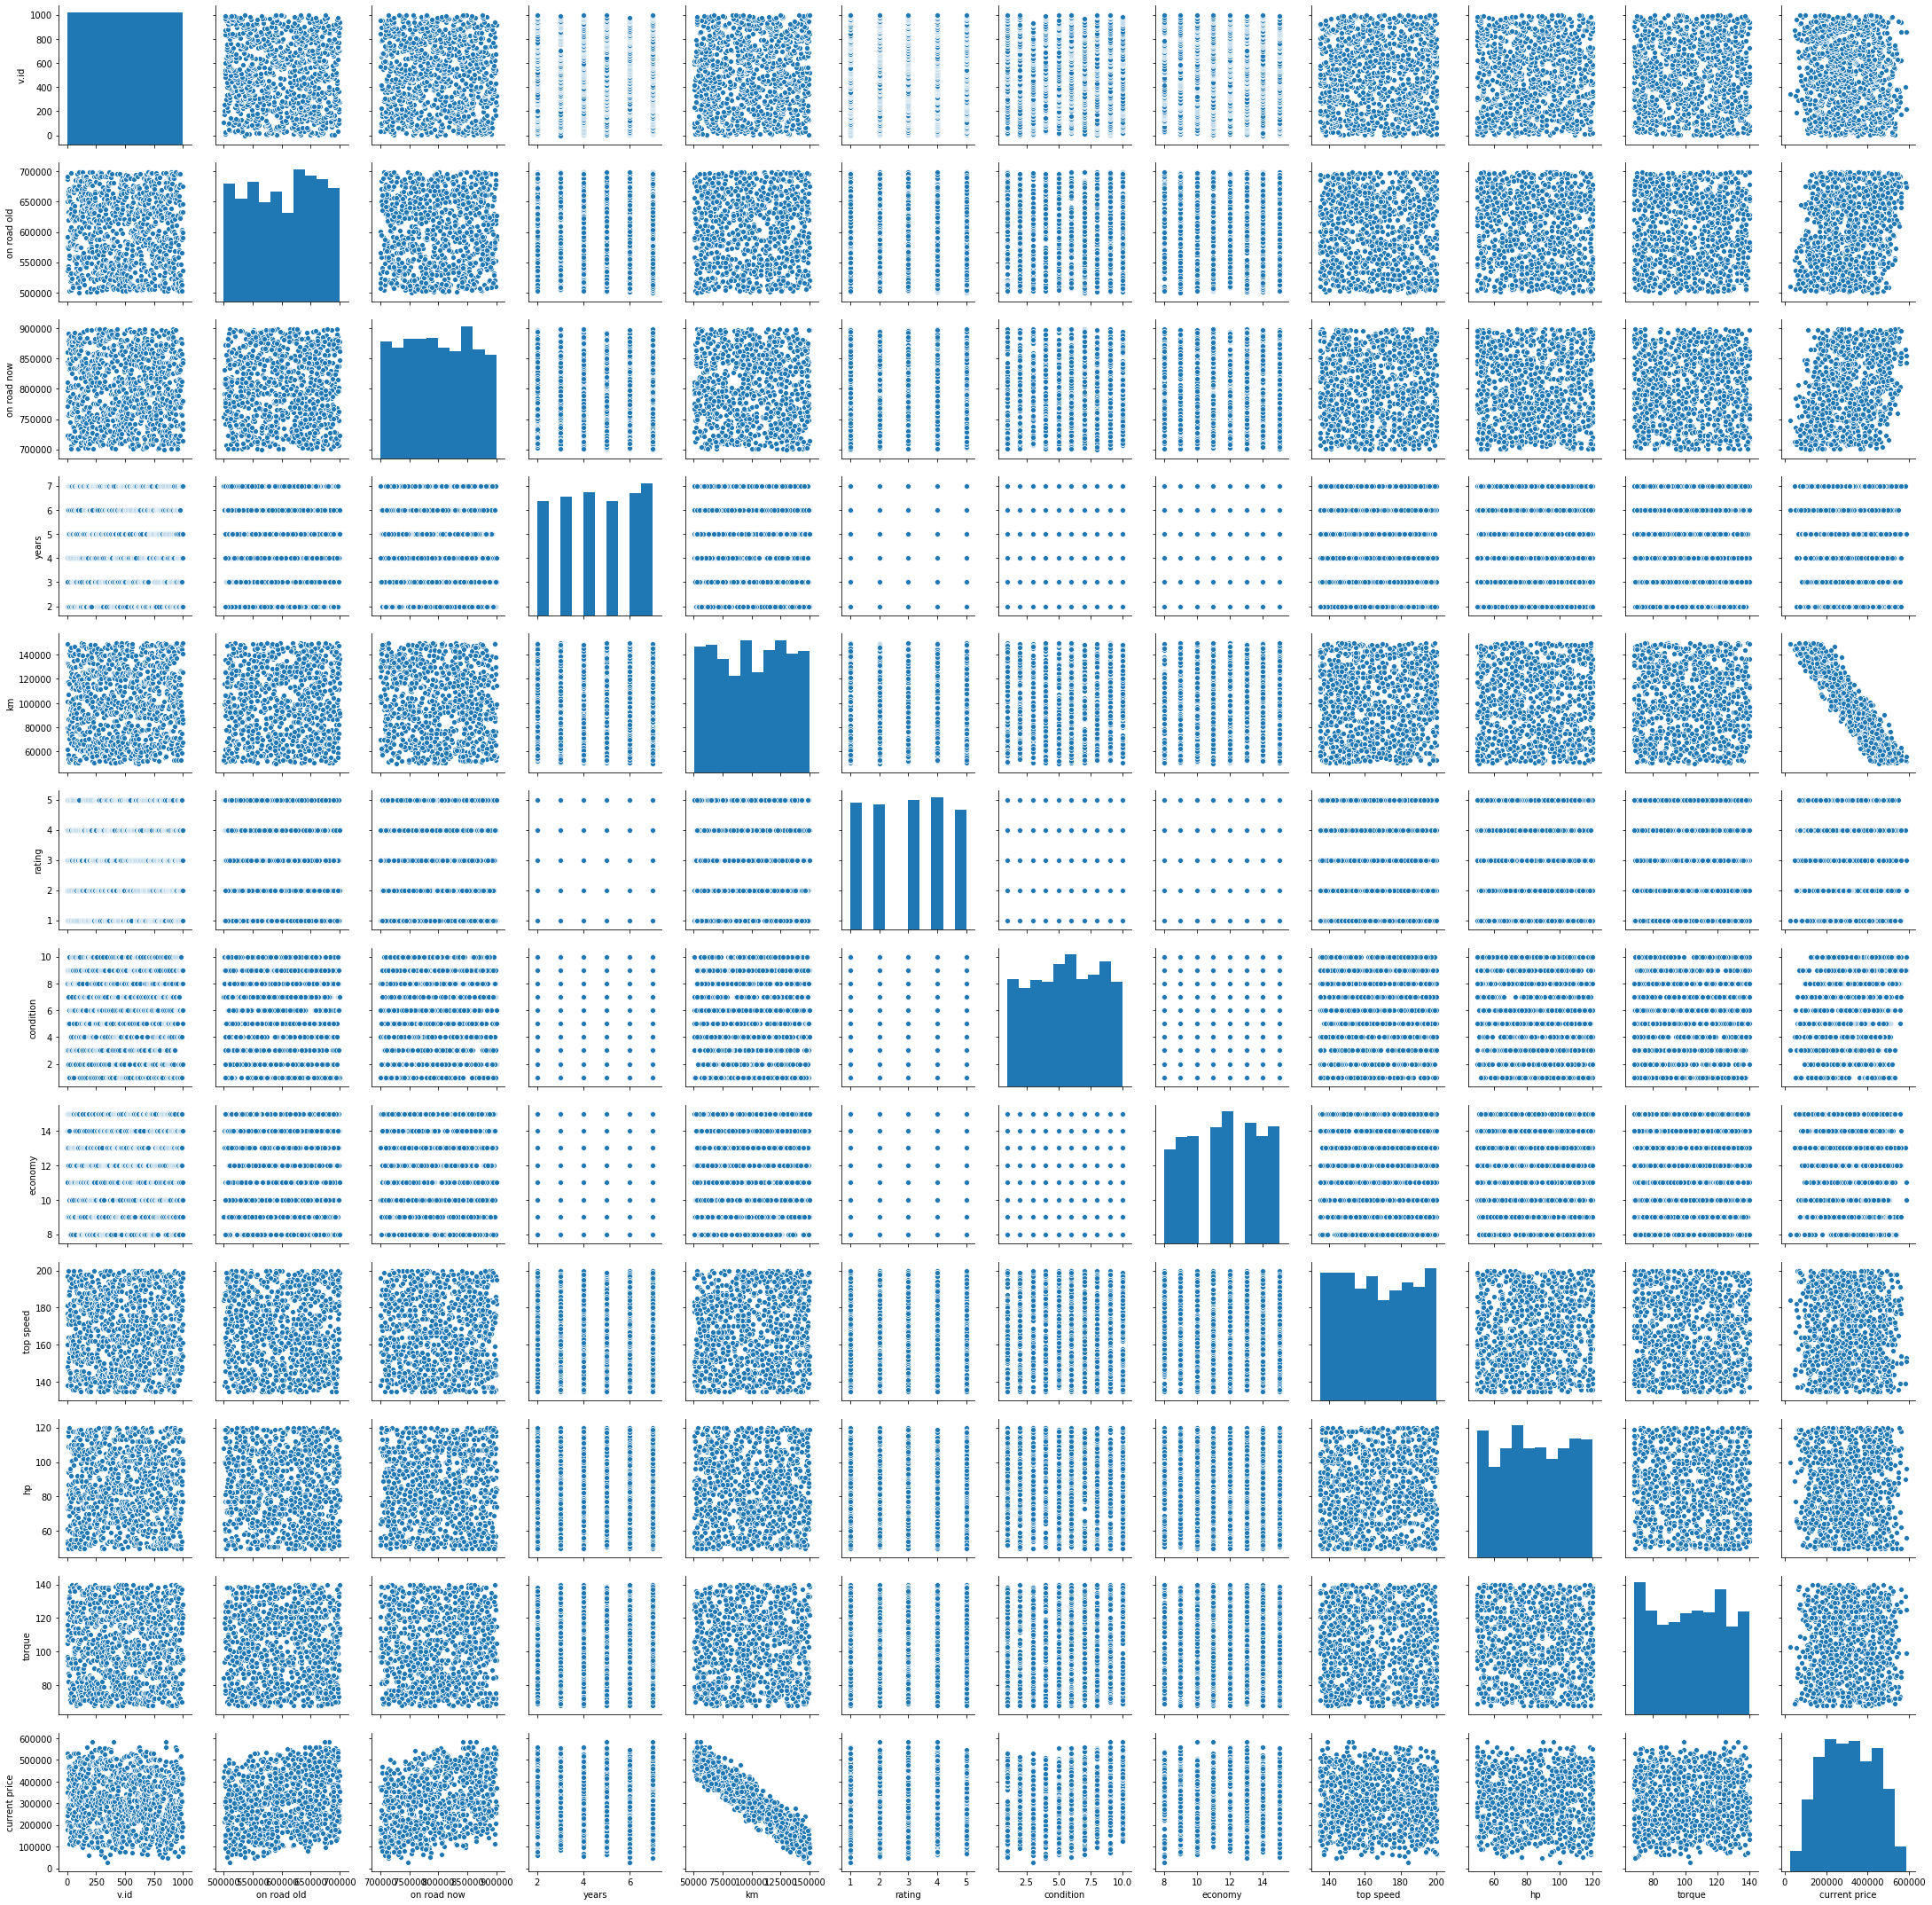

In [7]:
sns.pairplot(data)

In [8]:
data.corr()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
v.id,1.000000,-0.029926,-0.030787,-0.034255,0.047400,-0.018263,-0.038548,0.047137,0.001613,-0.006997,-0.000632,-0.059460
on road old,-0.029926,1.000000,0.034113,0.007207,0.007488,-0.050717,-0.015682,-0.030097,-0.023816,-0.049266,0.008950,0.233035
on road now,-0.030787,0.034113,1.000000,0.004609,-0.053202,0.028280,-0.005043,-0.015880,0.012699,-0.012719,0.017955,0.282793
years,-0.034255,0.007207,0.004609,1.000000,-0.002089,0.027285,0.053579,0.050220,0.025148,-0.003272,0.028859,-0.011854
km,0.047400,0.007488,-0.053202,-0.002089,1.000000,-0.039930,-0.013640,0.032680,0.026450,-0.052918,0.013566,-0.935924
rating,-0.018263,-0.050717,0.028280,0.027285,-0.039930,1.000000,0.015943,-0.009757,-0.042222,-0.022623,0.004408,0.035038
condition,-0.038548,-0.015682,-0.005043,0.053579,-0.013640,0.015943,1.000000,0.058788,0.018472,-0.071552,0.047805,0.110108
economy,0.047137,-0.030097,-0.015880,0.050220,0.032680,-0.009757,0.058788,1.000000,-0.059402,-0.016782,0.041632,-0.034711
top speed,0.001613,-0.023816,0.012699,0.025148,0.026450,-0.042222,0.018472,-0.059402,1.000000,0.057827,-0.019697,-0.027993
hp,-0.006997,-0.049266,-0.012719,-0.003272,-0.052918,-0.022623,-0.071552,-0.016782,0.057827,1.000000,-0.013817,0.030238


(12.0, 0.0)

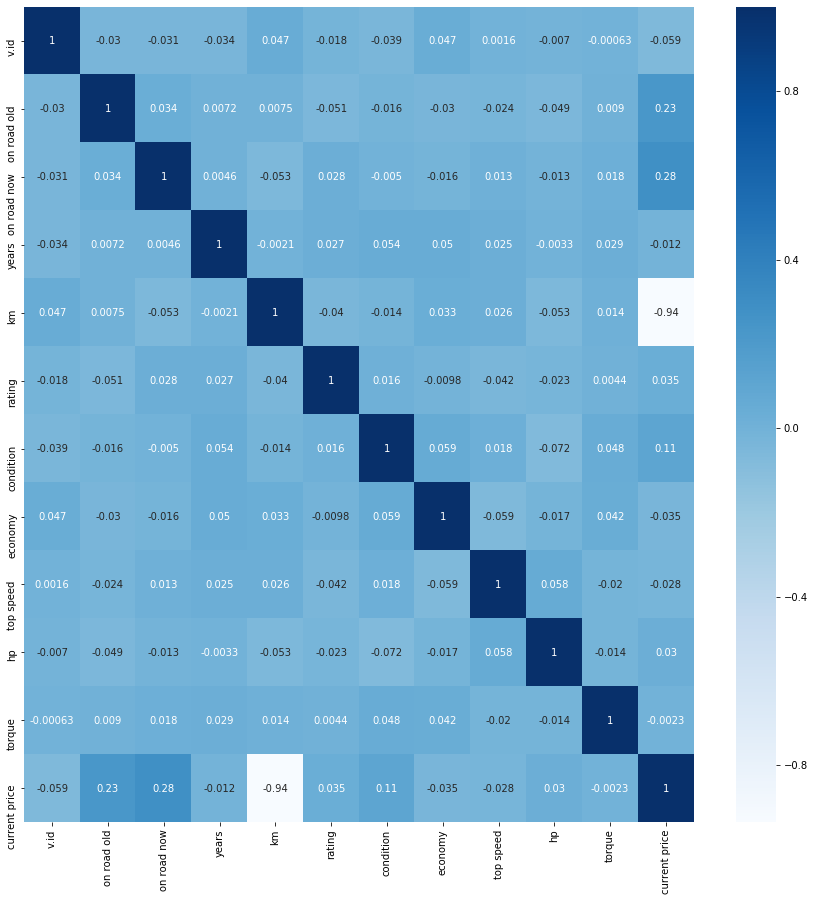

In [9]:
import matplotlib.pyplot as plt 
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), cmap='Blues', annot = True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

If we look at this correlation chart , it is observed that "km" is inversely propotional to the current price. On road new and on road old shows a direct relationhip. Rest all parameters shows lower relation with respect to the previous.

Let's divide the data set based on features. 

In [10]:
X= data.iloc[:, :-1]
y= data.iloc[:,  -1]

Current price will be an independent feature whose price will be predicted and rest all prices will be dependent feature in this cateogory.

Let's check about the feature importance using tree based regressor !!!

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model =  ExtraTreesRegressor()
model.fit(X, y)

C:\Users\KUSH CHADHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

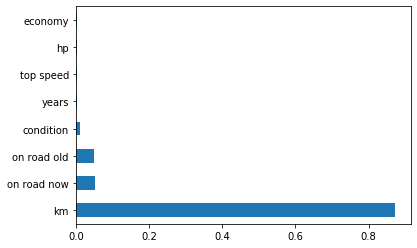

In [12]:
feat_importances  = pd.Series(model.feature_importances_ , index = X.columns)
feat_importances.nlargest(8).plot(kind ='barh')

If we check with the regressor, 4 features are mostly important !!!

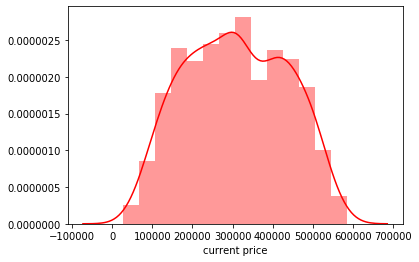

In [13]:
sns.distplot(y, color ='r')

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3 , random_state = 0) 

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
reg.score(X_train, y_train)

0.9952613947584088

In [18]:
reg.score(X_test, y_test)

0.9950863873725574

**If we check the accuracy of both the scores, there is no issue with the overfitting or under fitting data.** 

In [19]:
print('regressor score on the test data is : {}'.format(reg.score(X_test, y_test)))

regressor score on the test data is : 0.9950863873725574


In [20]:
z = []
for i in range(2,8):
    from sklearn.model_selection import cross_val_score
    score = cross_val_score(reg, X, y, cv = i)
    z.append(score)
print(z)

[array([0.9952282 , 0.99472552]), array([0.99539902, 0.99489907, 0.99499831]), array([0.99478272, 0.99587115, 0.99461293, 0.99494923]), array([0.99477805, 0.99588625, 0.99437076, 0.99530993, 0.9947838 ]), array([0.9951526 , 0.99552992, 0.99544616, 0.99424071, 0.99517298,
       0.99489802]), array([0.99532547, 0.99487813, 0.99628306, 0.99418922, 0.9946816 ,
       0.99570451, 0.99427663])]


In [21]:
prediction = reg.predict(X_test)

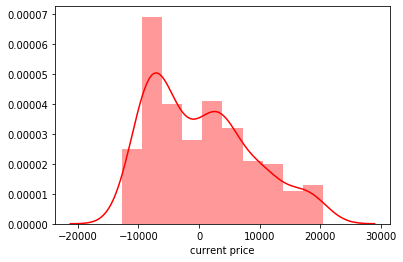

In [22]:
sns.distplot(y_test-prediction, color = 'r')

In [23]:
from sklearn import metrics 
import math
import numpy as np

print ('MAE:', metrics.mean_absolute_error(y_test, prediction))
print ('MSE:' ,metrics.mean_squared_error(y_test, prediction))
# print ('RMSE:', np.sqrt(metrics.neg_mean_squared_error(y_test, prediction)))

MAE: 7017.890789635657
MSE: 69597382.54505448


In [24]:
import pickle
# Open file where you want to store data 
file = open('regression_model_car.pkl', 'wb')

#Dump information to that file 
pickle.dump(reg, file)

**Ridge regression**

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [26]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [27]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-77733352.63270113


**Lasso regression** 

In [28]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [29]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\KUSH CHADHA\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30391698802.70814, tolerance: 1299497397.3886392
  positive)
C:\Users\KUSH CHADHA\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30401996143.247166, tolerance: 1224434873.5008554
  positive)
C:\Users\KUSH CHADHA\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29407351290.50623, tolerance: 1285984312.4273376
  positive)
C:\Users\KUSH CHADHA\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number 

{'alpha': 40}
-77720980.89445385


**Random forest prediction** 

In [30]:
import xgboost as xgb

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
regressor = RandomForestRegressor()

In [33]:
regressor.fit(X_train, y_train)

C:\Users\KUSH CHADHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
regressor.score(X_test, y_test)

0.9695008085162559

In [35]:
print('random forest regressor score on the test data is : {}'.format(regressor.score(X_test, y_test)))
print('random forest regressor score on the test data is : {}'.format(regressor.score(X_train, y_train)))

random forest regressor score on the test data is : 0.9695008085162559
random forest regressor score on the test data is : 0.9948725282762477


**Hyper parameter tuning** 

In [36]:
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [39]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [40]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [41]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [42]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   0.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=200, min_samples_spl

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 13.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [44]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [45]:
rf_random.best_score_

-402093480.2209659

In [46]:
from sklearn import metrics 
import math

print ('MAE:', metrics.mean_absolute_error(y_test, prediction))
print ('MSE:' ,metrics.mean_squared_error(y_test, prediction))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7017.890789635657
MSE: 69597382.54505448
RMSE: 8342.504572672075


In [47]:
import pickle
# Open file where you want to store data 
file = open('random_forest_regression_model_car.pkl', 'wb')

#Dump information to that file 
pickle.dump(rf_random, file)

Using ANN Keras modelling !!! 

In [48]:
import keras
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [49]:
NN_model = Sequential()
#Input layer 
NN_model.add(Dense(128, kernel_initializer='normal', input_dim = X_train.shape[1]))

#Hidden layer 
NN_model.add(Dense(256, kernel_initializer='normal',activation = 'linear'))
NN_model.add(Dense(256, kernel_initializer='normal',activation = 'linear'))
NN_model.add(Dense(256, kernel_initializer='normal',activation = 'linear'))

#Output layer 
NN_model.add(Dense(1, kernel_initializer='normal',activation = 'linear')) # for classification use sigmoid 

#Complie the network 
NN_model.compile(loss='mean_absolute_error', optimizer = 'adam', metrics=['mean_absolute_error'])
NN_model.summary()

#Fiting ANN to training set 

model_history = NN_model.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, nb_epoch = 100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________


C:\Users\KUSH CHADHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 468 samples, validate on 232 samples
Epoch 1/100
468/468 [==============================] - 1s 3ms/step - loss: 131988.3349 - mean_absolute_error: 131988.3281 - val_loss: 117233.9406 - val_mean_absolute_error: 117233.9297
Epoch 2/100
468/468 [==============================] - 0s 639us/step - loss: 97978.3486 - mean_absolute_error: 97978.3672 - val_loss: 68268.8629 - val_mean_absolute_error: 68268.8594
Epoch 3/100
468/468 [==============================] - 0s 668us/step - loss: 30287.5040 - mean_absolute_error: 30287.5020 - val_loss: 45563.3397 - val_mean_absolute_error: 45563.3438
Epoch 4/100
468/468 [==============================] - 0s 726us/step - loss: 28664.4900 - mean_absolute_error: 28664.4941 - val_loss: 22069.5596 - val_mean_absolute_error: 22069.5566
Epoch 5/100
468/468 [==============================] - 0s 734us/step - loss: 16597.2011 - mean_absolute_error: 16597.2012 - val_loss: 12704.1993 - val_mean_absolute_error: 12704.1982
Epoch 6/100
468/468 [================

In [50]:
prediction = NN_model.predict(X_test)

In [51]:
y_test

993    307255.0
859    380928.5
298    121022.0
553    174352.5
672    190949.0
         ...   
167    299129.5
998     74398.0
984    181428.5
491    515167.5
10     292308.5
Name: current price, Length: 300, dtype: float64

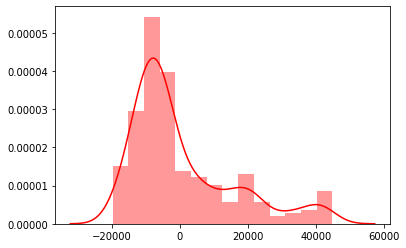

In [52]:
sns.distplot(y_test.values.reshape(-1, 1)-prediction, color = 'r')

In [53]:
from sklearn import metrics 
import math
import numpy as np

print ('MAE:', metrics.mean_absolute_error(y_test, prediction))
print ('MSE:' ,metrics.mean_squared_error(y_test, prediction))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 11834.2209375
MSE: 230805742.95277017
RMSE: 15192.29222180676
